In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [241]:
ethnicity_data_df = pd.read_csv("Data/cleaned_ethnicity_data.csv")
ethnicity_data_df.set_index("Year",inplace=True,drop="True")

ethnicity_data_df = ethnicity_data_df.sort_values(by='Year')

ethnicity_data_df.index = ethnicity_data_df.index.astype("str")
ethnicity_data_df.head()

,gender,ethnicity_major,ethnicity_minor,free_school_meals,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_entered_eng_maths,perc_achieving_grade_5to9_eng_maths
Year,,,,,,,,,,
2019,Total,Mixed,White and Black Caribbean,Total,2325,7504,41.0,-0.38,96.0,31.0
2019,Boys,Black,Any other black background,Total,917,1941,38.7,-0.23,93.9,28.8
2019,Boys,White,White British,Total,3656,191322,43.6,-0.38,96.2,39.2
2019,Girls,Mixed,White and Black Caribbean,FSM all other,1443,2850,47.2,0.04,98.2,39.2
2019,Girls,White,Gypsy/Roma,FSM,141,206,20.2,-0.70,81.6,6.3


In [242]:
# Extract data for gender analysis

gender_df = ethnicity_data_df[((ethnicity_data_df["gender"]=="Boys") | (ethnicity_data_df["gender"]=="Girls")) \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]

# Progress 8 data does not exist for 2020 and 2021, so filter out
gender_p8_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                               & ((ethnicity_data_df["gender"]=="Boys") | (ethnicity_data_df["gender"]=="Girls")) \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]

# reduce the data set as only need to look at the attainment (a8) and progress (p8) scores
a8_gender_reduced_df = gender_df[["gender","avg_attainment8_score"]]
p8_gender_reduced_df = gender_p8_df[["gender","avg_progress8_score"]]

# find the difference between the a8 and p8 scores. Subtract the even and odd rows. 
a8_gender_diff_df = abs(a8_gender_reduced_df.iloc[::2]["avg_attainment8_score"] - a8_gender_reduced_df.iloc[1::2]["avg_attainment8_score"])
p8_gender_diff_df = abs(p8_gender_reduced_df.iloc[::2]["avg_progress8_score"] - p8_gender_reduced_df.iloc[1::2]["avg_progress8_score"])

# Set the index as an integer for the regression plot.
a8_gender_diff_df.index = a8_gender_diff_df.index.astype("int")
p8_gender_diff_df.index = p8_gender_diff_df.index.astype("int")

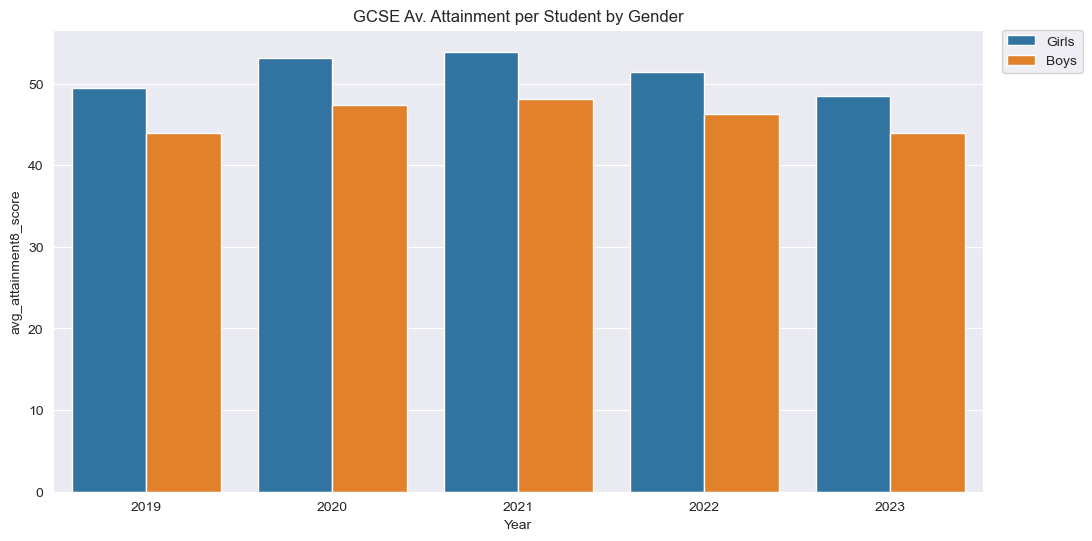

In [269]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
fig1 = sns.barplot(data=a8_gender_reduced_df, x=a8_gender_reduced_df.index,y=a8_gender_reduced_df["avg_attainment8_score"],hue="gender")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("GCSE Av. Attainment per Student by Gender")
plt.savefig("Graphs/fig1.png")
plt.show()


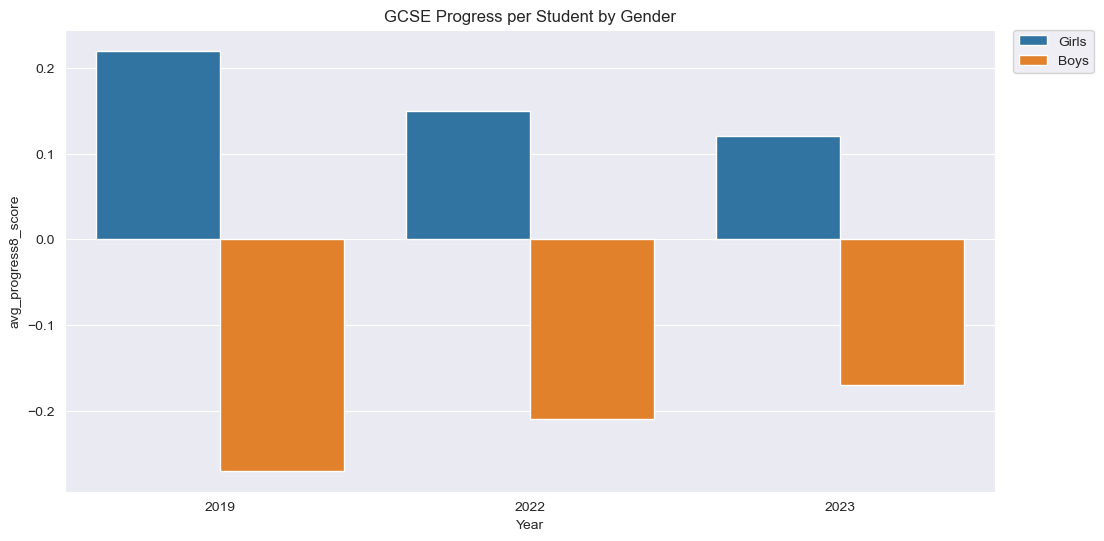

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("GCSE Progress per Student by Gender")
sns.barplot(data=p8_gender_reduced_df, x=p8_gender_reduced_df.index,y=p8_gender_reduced_df["avg_progress8_score"],hue="gender")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

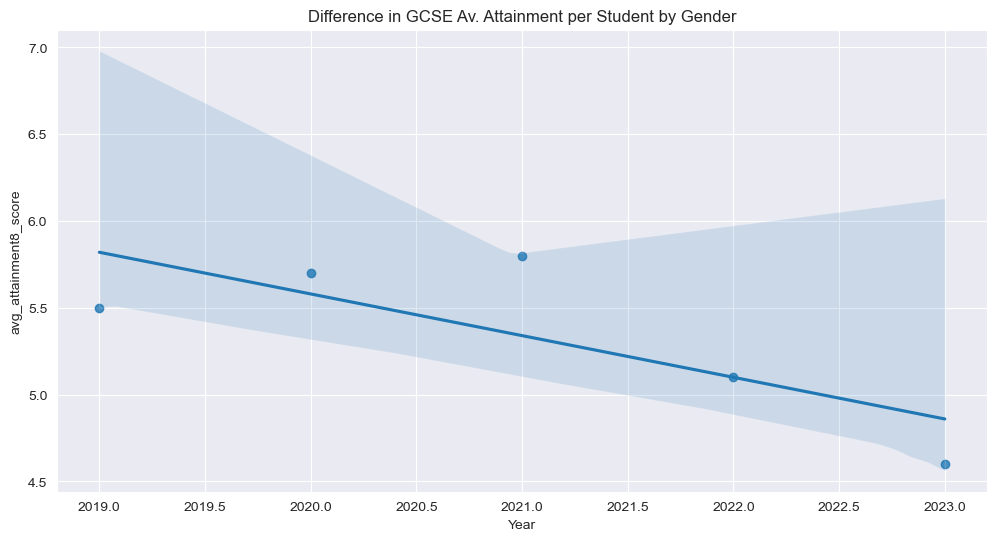

In [125]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Difference in GCSE Av. Attainment per Student by Gender")
sns.regplot(x=a8_gender_diff_df.index,y=a8_gender_diff_df)
plt.show()

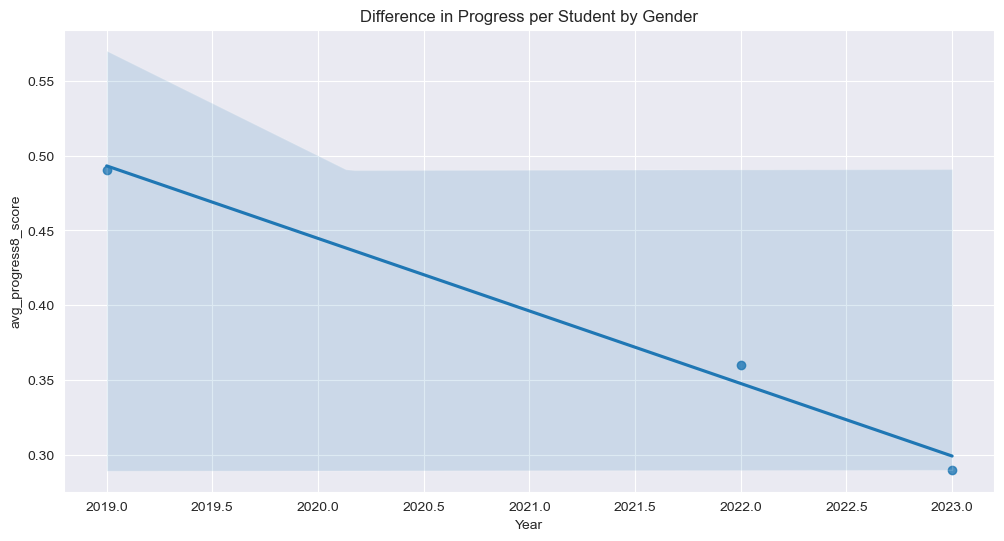

In [126]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Difference in Progress per Student by Gender")
#sns.lineplot(data=p8_gender_diff_df, x=p8_gender_diff_df.index,y=p8_gender_diff_df,marker="o",markersize=10)
sns.regplot(x=p8_gender_diff_df.index,y=p8_gender_diff_df)
plt.show()

In [206]:
all_boys_a8_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Boys")\
                                & (ethnicity_data_df["free_school_meals"]=="Total") \
                                &  (ethnicity_data_df["ethnicity_minor"]=="Total")]  

all_girls_a8_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Girls")\
                                & (ethnicity_data_df["free_school_meals"]=="Total") \
                                &  (ethnicity_data_df["ethnicity_minor"]=="Total")]  

all_boys_p8_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                                & (ethnicity_data_df["gender"]=="Boys")\
                                & (ethnicity_data_df["free_school_meals"]=="Total") \
                                &  (ethnicity_data_df["ethnicity_minor"]=="Total")]  

all_girls_p8_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                                & (ethnicity_data_df["gender"]=="Girls")\
                                & (ethnicity_data_df["free_school_meals"]=="Total") \
                                &  (ethnicity_data_df["ethnicity_minor"]=="Total")]  



all_boys_a8_red_df= all_boys_a8_df[["ethnicity_major","avg_attainment8_score"]]
all_girls_a8_red_df= all_girls_a8_df[["ethnicity_major","avg_attainment8_score"]]
all_boys_p8_red_df= all_boys_p8_df[["ethnicity_major","avg_progress8_score"]]
all_girls_p8_red_df= all_girls_p8_df[["ethnicity_major","avg_progress8_score"]]

all_boys_a8_total = all_boys_a8_red_df[(all_boys_a8_red_df["ethnicity_major"] =="Total")]
all_girls_a8_total = all_girls_a8_red_df[(all_girls_a8_red_df["ethnicity_major"] =="Total")]
all_boys_p8_total = all_boys_p8_red_df[(all_boys_p8_red_df["ethnicity_major"] =="Total")]
all_girls_p8_total = all_girls_p8_red_df[(all_girls_p8_red_df["ethnicity_major"] =="Total")]

all_boys_a8_red_df = all_boys_a8_red_df[(all_boys_a8_red_df["ethnicity_major"] !="Total") & (all_boys_a8_red_df["ethnicity_major"] !="Unclassified") & (all_boys_a8_red_df["ethnicity_major"] !="Other") & (all_boys_a8_red_df["ethnicity_major"] !="Chinese")]  
all_girls_a8_red_df = all_girls_a8_red_df[(all_girls_a8_red_df["ethnicity_major"] !="Total") & (all_girls_a8_red_df["ethnicity_major"] !="Unclassified") & (all_girls_a8_red_df["ethnicity_major"] !="Other") & (all_girls_a8_red_df["ethnicity_major"] !="Chinese")]  
all_boys_p8_red_df = all_boys_p8_red_df[(all_boys_p8_red_df["ethnicity_major"] !="Total") & (all_boys_p8_red_df["ethnicity_major"] !="Unclassified") & (all_boys_p8_red_df["ethnicity_major"] !="Other") & (all_boys_p8_red_df["ethnicity_major"] !="Chinese")]  
all_girls_p8_red_df = all_girls_p8_red_df[(all_girls_p8_red_df["ethnicity_major"] !="Total") & (all_girls_p8_red_df["ethnicity_major"] !="Unclassified") & (all_girls_p8_red_df["ethnicity_major"] !="Other") & (all_girls_p8_red_df["ethnicity_major"] !="Chinese")]  

all_boys_a8_red_df = all_boys_a8_red_df.sort_values("ethnicity_major")
all_girls_a8_red_df = all_girls_a8_red_df.sort_values("ethnicity_major")
all_boys_p8_red_df = all_boys_p8_red_df.sort_values("ethnicity_major")
all_girls_p8_red_df = all_girls_p8_red_df.sort_values("ethnicity_major")

all_boys_a8_red_df.index = all_boys_a8_red_df.index.astype("int")
all_girls_a8_red_df.index = all_girls_a8_red_df.index.astype("int")
all_boys_p8_red_df.index = all_boys_p8_red_df.index.astype("int")
all_girls_p8_red_df.index = all_girls_p8_red_df.index.astype("int")

all_boys_a8_red_df 

,ethnicity_major,avg_attainment8_score
Year,,
2019,Asian,48.6
2022,Asian,52.2
2023,Asian,50.8
2020,Asian,51.9
2021,Asian,53.0
2019,Black,41.1
2023,Black,42.9
2022,Black,44.9
2021,Black,46.3


[]

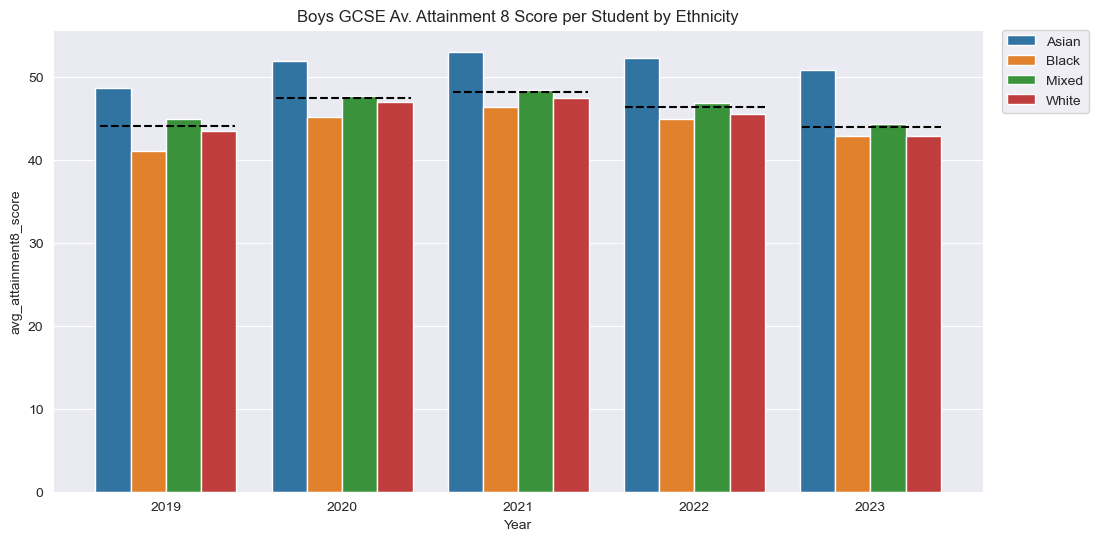

In [266]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Boys GCSE Av. Attainment 8 Score per Student by Ethnicity")
ax=sns.barplot(data=all_boys_a8_red_df, x=all_boys_a8_red_df.index,y=all_boys_a8_red_df["avg_attainment8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.axhline(y=all_boys_a8_total.iloc[0][1],xmin = 0.05,xmax = 0.195,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_total.iloc[1][1],xmin = 0.24,xmax = 0.385,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_total.iloc[2][1],xmin = 0.43,xmax = 0.575,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_total.iloc[3][1],xmin = 0.615,xmax = 0.765,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_total.iloc[4][1],xmin = 0.805,xmax = 0.955,color="black",linestyle="dashed")
plt.plot()

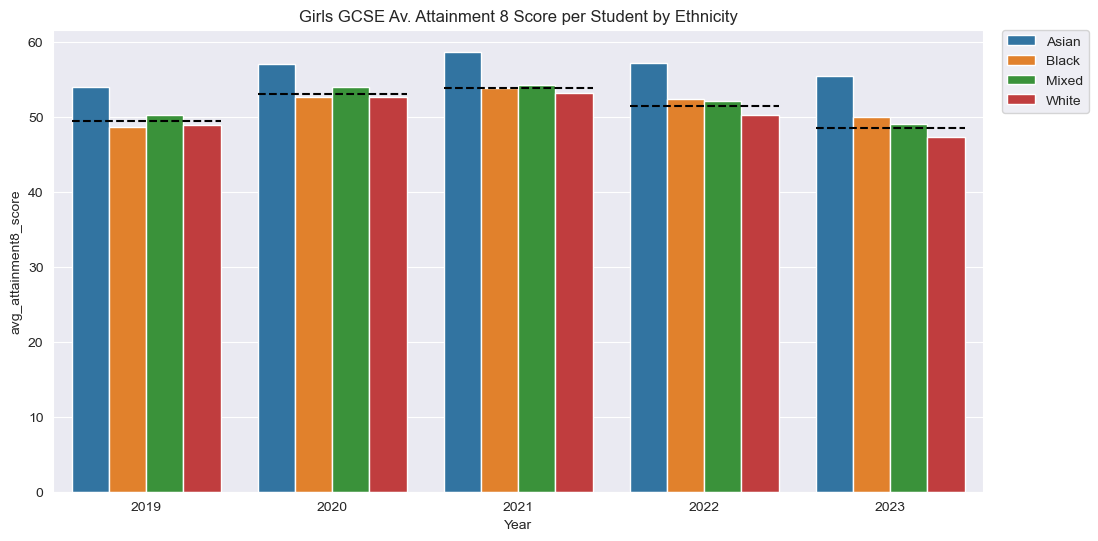

In [229]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Girls GCSE Av. Attainment 8 Score per Student by Ethnicity")
ax=sns.barplot(data=all_girls_a8_red_df, x=all_girls_a8_red_df.index,y=all_girls_a8_red_df["avg_attainment8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.axhline(y=all_girls_a8_total.iloc[0][1],xmin = 0.02,xmax = 0.18,color="black",linestyle="dashed")
ax.axhline(y=all_girls_a8_total.iloc[1][1],xmin = 0.22,xmax = 0.38,color="black",linestyle="dashed")
ax.axhline(y=all_girls_a8_total.iloc[2][1],xmin = 0.42,xmax = 0.58,color="black",linestyle="dashed")
ax.axhline(y=all_girls_a8_total.iloc[3][1],xmin = 0.62,xmax = 0.78,color="black",linestyle="dashed")
ax.axhline(y=all_girls_a8_total.iloc[4][1],xmin = 0.82,xmax = 0.98,color="black",linestyle="dashed")

[]

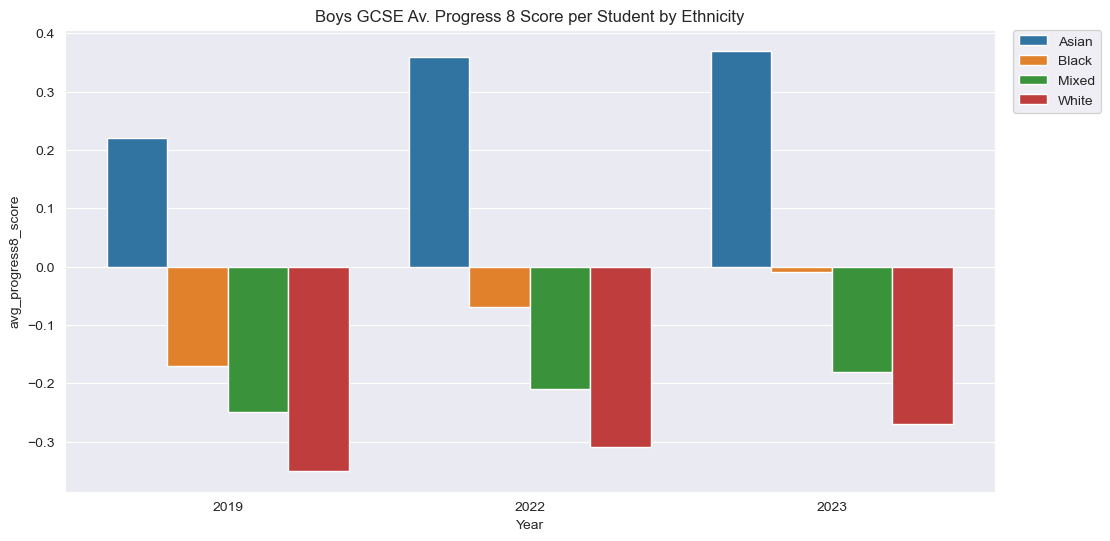

In [231]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Boys GCSE Av. Progress 8 Score per Student by Ethnicity")
ax=sns.barplot(data=all_boys_p8_red_df, x=all_boys_p8_red_df.index,y=all_boys_p8_red_df["avg_progress8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.plot()

[]

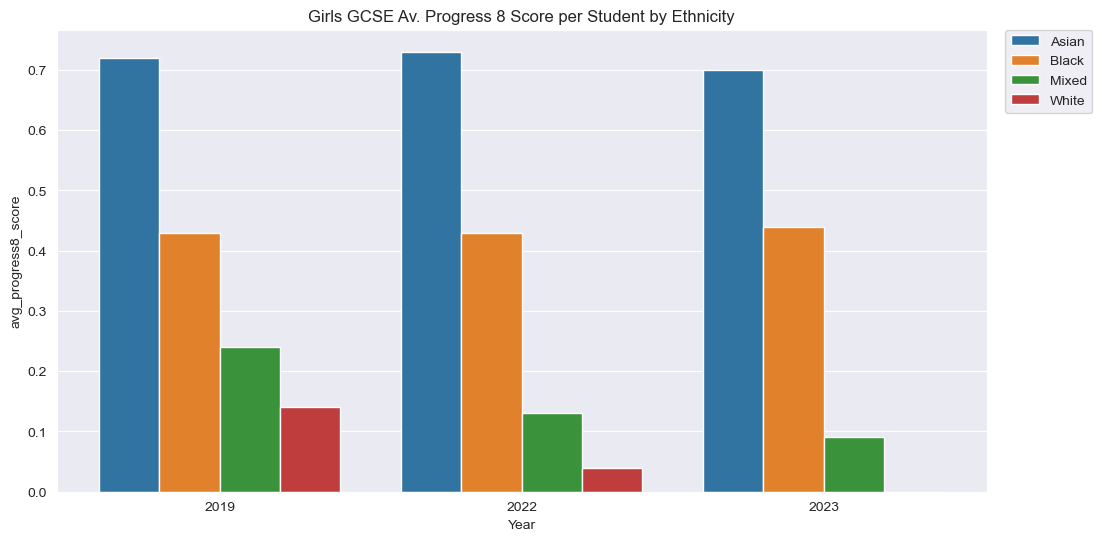

In [233]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Girls GCSE Av. Progress 8 Score per Student by Ethnicity")
ax=sns.barplot(data=all_girls_p8_red_df, x=all_girls_p8_red_df.index,y=all_girls_p8_red_df["avg_progress8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.plot()

In [234]:
tot_a8_fsm_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Total") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total")\
                               & ((ethnicity_data_df["free_school_meals"]=="FSM") |  (ethnicity_data_df["free_school_meals"]=="FSM all other"))]

tot_p8_fsm_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                               & (ethnicity_data_df["gender"]=="Total") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total")\
                               & ((ethnicity_data_df["free_school_meals"]=="FSM") |  (ethnicity_data_df["free_school_meals"]=="FSM all other"))]

tot_a8_fsm_df = tot_a8_fsm_df.replace(to_replace="FSM all other",value="Non FSM")
tot_p8_fsm_df = tot_p8_fsm_df.replace(to_replace="FSM all other",value="Non FSM")

tot_a8_fsm_df = tot_a8_fsm_df[["free_school_meals","avg_attainment8_score"]]
tot_p8_fsm_df = tot_p8_fsm_df[["free_school_meals","avg_progress8_score"]]

tot_a8_fsm_diff = abs(tot_a8_fsm_df.iloc[::2]["avg_attainment8_score"] - tot_a8_fsm_df.iloc[1::2]["avg_attainment8_score"])
tot_p8_fsm_diff = abs(tot_p8_fsm_df.iloc[::2]["avg_progress8_score"] - tot_p8_fsm_df.iloc[1::2]["avg_progress8_score"])

tot_a8_fsm_diff = pd.DataFrame(tot_a8_fsm_diff)
tot_a8_fsm_diff =tot_a8_fsm_diff.rename(columns={ "avg_attainment8_score":"Difference in A8 Scores"})
tot_p8_fsm_diff = pd.DataFrame(tot_p8_fsm_diff)
tot_p8_fsm_diff= tot_p8_fsm_diff.rename(columns={"avg_progress8_score":"Difference in P8 Scores"})

tot_a8_fsm_diff.index = tot_a8_fsm_diff.index.astype("int")
tot_p8_fsm_diff.index = tot_p8_fsm_diff.index.astype("int")

tot_a8_fsm_diff

,Difference in A8 Scores
Year,
2019,13.7
2020,13.7
2021,14.5
2022,15.0
2023,14.8


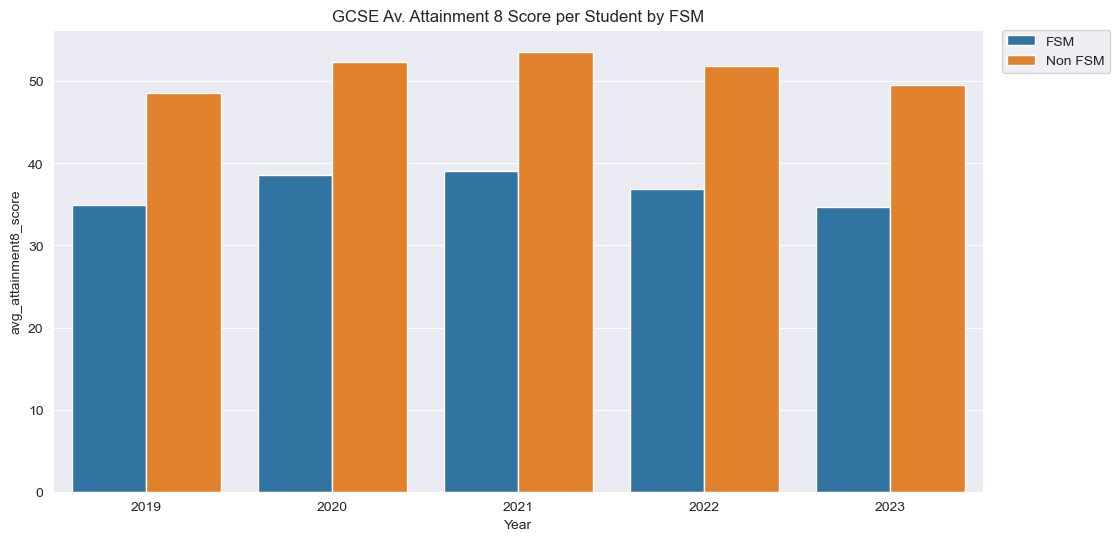

In [122]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("GCSE Av. Attainment 8 Score per Student by FSM")
ax=sns.barplot(data=tot_a8_fsm_df, x=tot_a8_fsm_df.index,y=tot_a8_fsm_df["avg_attainment8_score"],hue="free_school_meals")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

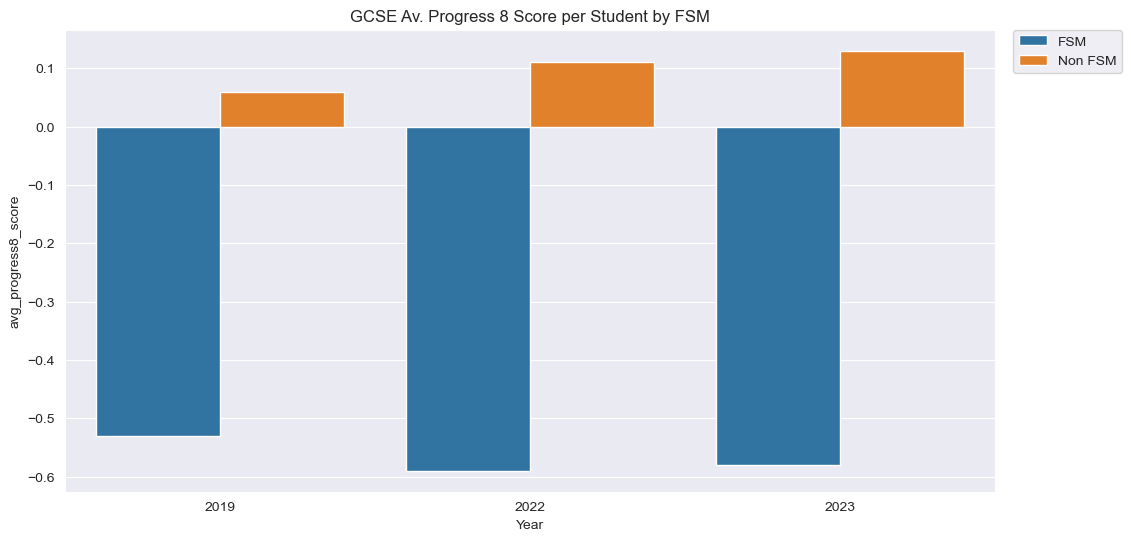

In [235]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("GCSE Av. Progress 8 Score per Student by FSM")
ax=sns.barplot(data=tot_p8_fsm_df, x=tot_p8_fsm_df.index,y=tot_p8_fsm_df["avg_progress8_score"],hue="free_school_meals")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

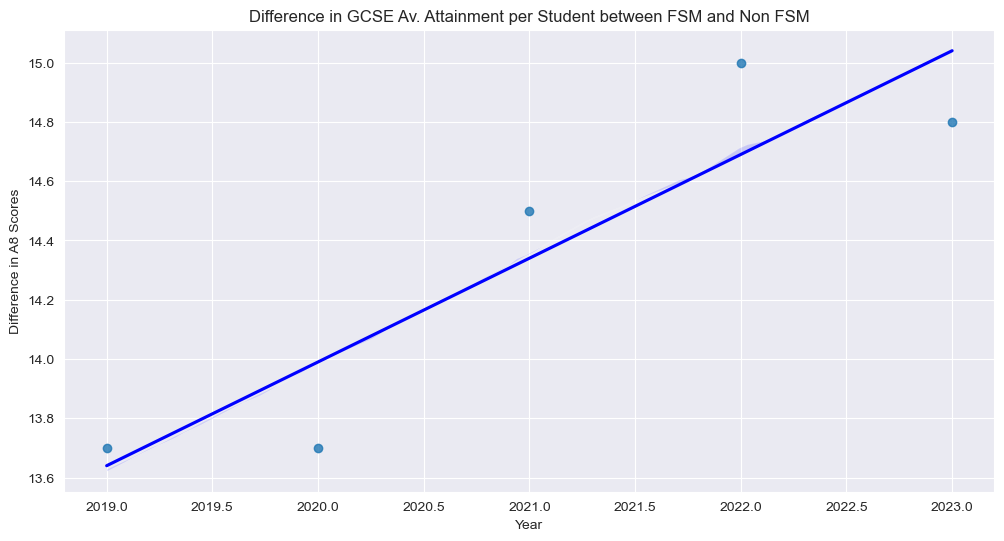

In [271]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Difference in GCSE Av. Attainment per Student between FSM and Non FSM")
#sns.lineplot(data=tot_a8_fsm_diff , x=tot_a8_fsm_diff .index,y=tot_a8_fsm_diff ,marker="o",markersize=10)
sns.regplot(x=tot_a8_fsm_diff.index,y=tot_a8_fsm_diff,line_kws = {"color": "blue"},ci = 1)
plt.show()

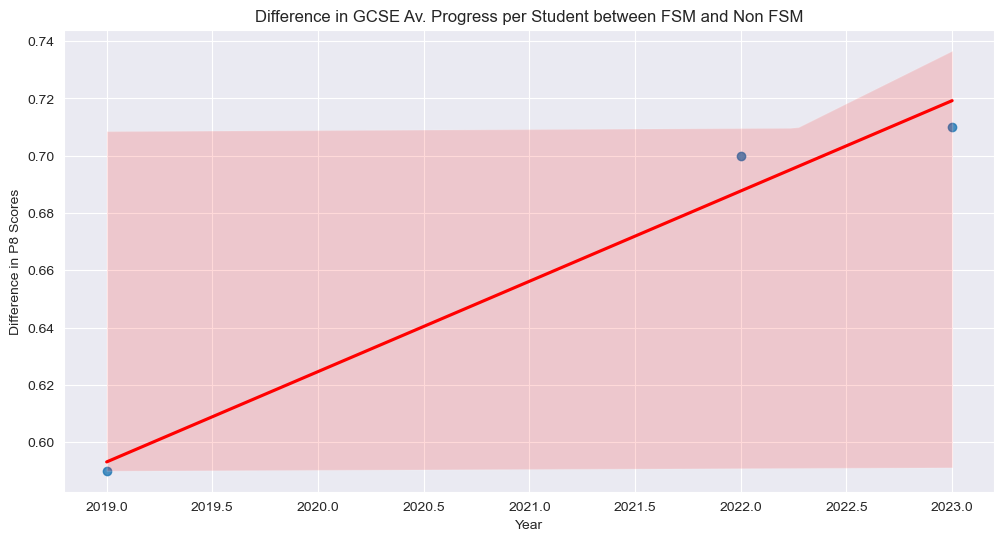

In [237]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Difference in GCSE Av. Progress per Student between FSM and Non FSM")
sns.regplot(x=tot_p8_fsm_diff.index,y=tot_p8_fsm_diff,line_kws = {"color": "red"},ci = 95)
plt.show()

In [ ]:
hue_plot = sns.lineplot(data=tot_a8_fsm_df, x=tot_a8_fsm_df.index,y=tot_a8_fsm_df["avg_attainment8_score"],hue="free_school_meals")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [238]:
boys_a8_fsm_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Boys") \
                                & (ethnicity_data_df["free_school_meals"]=="FSM")
                                & (ethnicity_data_df["ethnicity_minor"]=="Total")]

boys_a8_non_fsm_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Boys") \
                                & ((ethnicity_data_df["free_school_meals"]=="FSM all other")) \
                                & (ethnicity_data_df["ethnicity_minor"]=="Total")]

boys_p8_fsm_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021"))
                                &(ethnicity_data_df["gender"]=="Boys") \
                                & ((ethnicity_data_df["free_school_meals"]=="FSM")) \
                                & (ethnicity_data_df["ethnicity_minor"]=="Total")]

boys_p8_non_fsm_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021"))
                                &(ethnicity_data_df["gender"]=="Boys") \
                                & ((ethnicity_data_df["free_school_meals"]=="FSM all other"))\
                                & (ethnicity_data_df["ethnicity_minor"]=="Total")]



boys_a8_fsm_df = boys_a8_fsm_df[["ethnicity_major","avg_attainment8_score"]]
boys_p8_fsm_df =boys_p8_fsm_df[["ethnicity_major","avg_progress8_score"]]
boys_a8_non_fsm_df = boys_a8_non_fsm_df[["ethnicity_major","avg_attainment8_score"]]
boys_p8_non_fsm_df = boys_p8_non_fsm_df[["ethnicity_major","avg_progress8_score"]]


all_boys_a8_fsm_df = boys_a8_fsm_df[(boys_a8_fsm_df["ethnicity_major"] =="Total")]
all_boys_p8_fsm_df = boys_p8_fsm_df[(boys_p8_fsm_df["avg_progress8_score"] =="Total")]
all_boys_a8_non_fsm_df = boys_a8_non_fsm_df[(boys_a8_non_fsm_df["ethnicity_major"] =="Total")]
all_boys_p8_non_fsm_df = boys_p8_non_fsm_df[(boys_p8_non_fsm_df["avg_progress8_score"] =="Total")]



boys_a8_fsm_red_df = boys_a8_fsm_df[(boys_a8_fsm_df["ethnicity_major"] =="White") \
                                   | (boys_a8_fsm_df["ethnicity_major"] =="Asian") \
                                   | (boys_a8_fsm_df["ethnicity_major"] =="Black") \
                                   |(boys_a8_fsm_df["ethnicity_major"] =="Mixed")] 

boys_a8_non_fsm_red_df = boys_a8_non_fsm_df[(boys_a8_non_fsm_df["ethnicity_major"] =="White") \
                                   | (boys_a8_non_fsm_df["ethnicity_major"] =="Asian") \
                                   | (boys_a8_non_fsm_df["ethnicity_major"] =="Black") \
                                   |(boys_a8_non_fsm_df["ethnicity_major"] =="Mixed")] 

boys_p8_fsm_red_df = boys_p8_fsm_df[(boys_p8_fsm_df["ethnicity_major"] =="White") \
                                   | (boys_p8_fsm_df["ethnicity_major"] =="Asian") \
                                   | (boys_p8_fsm_df["ethnicity_major"] =="Black") \
                                   |(boys_p8_fsm_df["ethnicity_major"] =="Mixed")] 

boys_p8_non_fsm_red_df = boys_p8_non_fsm_df[(boys_p8_non_fsm_df["ethnicity_major"] =="White") \
                                   | (boys_p8_non_fsm_df["ethnicity_major"] =="Asian") \
                                   | (boys_p8_non_fsm_df["ethnicity_major"] =="Black") \
                                   |(boys_p8_non_fsm_df["ethnicity_major"] =="Mixed")] 

boys_a8_fsm_red_df = boys_a8_fsm_red_df.sort_values("ethnicity_major")
boys_a8_non_fsm_red_df = boys_a8_non_fsm_red_df.sort_values("ethnicity_major")
boys_p8_fsm_red_df = boys_p8_fsm_red_df.sort_values("ethnicity_major")
boys_p8_non_fsm_red_df = boys_p8_non_fsm_red_df.sort_values("ethnicity_major")

boys_a8_fsm_red_df.index = boys_a8_fsm_red_df.index.astype("int")
boys_a8_non_fsm_red_df.index =boys_a8_non_fsm_red_df.index.astype("int")
boys_p8_fsm_red_df.index = boys_p8_fsm_red_df.index.astype("int")
boys_a8_non_fsm_red_df.index = boys_a8_non_fsm_red_df.index.astype("int")


boys_a8_non_fsm_red_df

,ethnicity_major,avg_attainment8_score
Year,,
2019,Asian,50.1
2023,Asian,53.1
2020,Asian,53.5
2022,Asian,54.4
2021,Asian,55.0
2019,Black,42.8
2020,Black,47.0
2022,Black,47.2
2021,Black,48.5


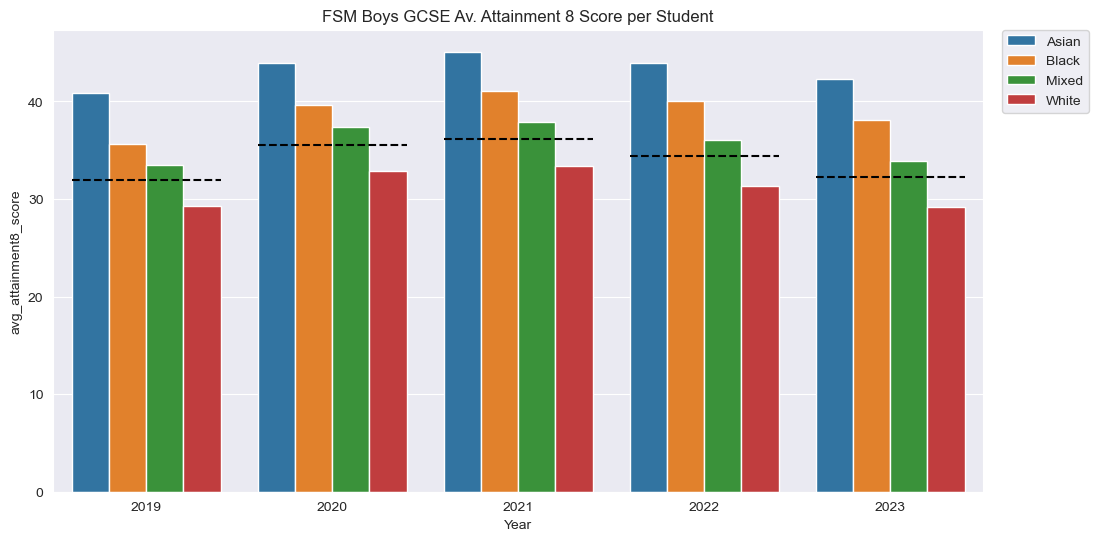

In [239]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("FSM Boys GCSE Av. Attainment 8 Score per Student")
ax=sns.barplot(data=boys_a8_fsm_red_df, x=boys_a8_fsm_red_df.index,y=boys_a8_fsm_red_df["avg_attainment8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.axhline(y=all_boys_a8_fsm_df.iloc[0][1],xmin = 0.02,xmax = 0.18,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_fsm_df.iloc[1][1],xmin = 0.22,xmax = 0.38,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_fsm_df.iloc[2][1],xmin = 0.42,xmax = 0.58,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_fsm_df.iloc[3][1],xmin = 0.62,xmax = 0.78,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_fsm_df.iloc[4][1],xmin = 0.82,xmax = 0.98,color="black",linestyle="dashed")

plt.show()

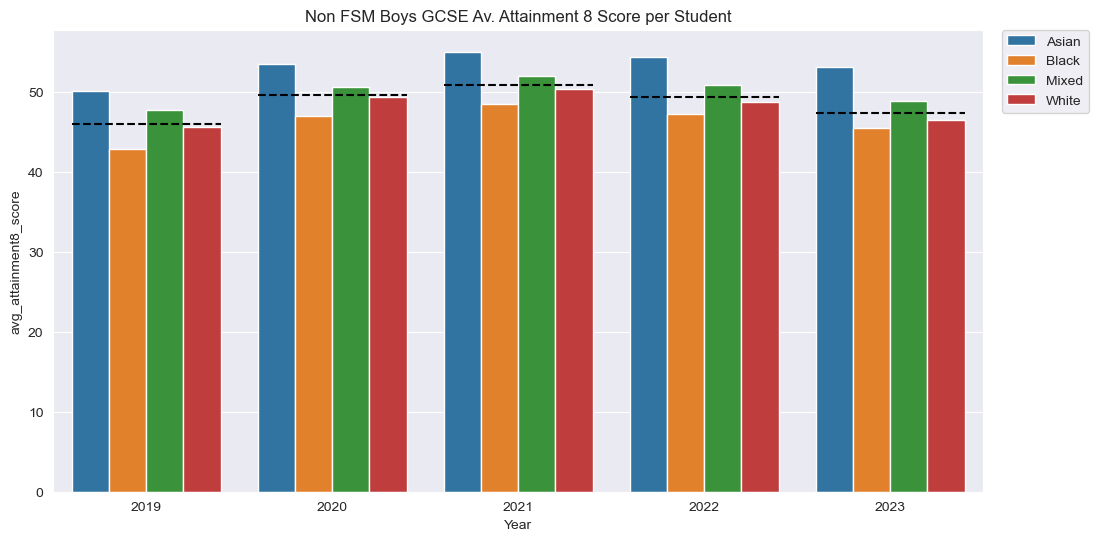

In [202]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Non FSM Boys GCSE Av. Attainment 8 Score per Student")
ax=sns.barplot(data=boys_a8_non_fsm_red_df, x=boys_a8_non_fsm_red_df.index,y=boys_a8_non_fsm_red_df["avg_attainment8_score"],hue="ethnicity_major")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.axhline(y=all_boys_a8_non_fsm_df.iloc[0][1],xmin = 0.02,xmax = 0.18,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_non_fsm_df.iloc[1][1],xmin = 0.22,xmax = 0.38,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_non_fsm_df.iloc[2][1],xmin = 0.42,xmax = 0.58,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_non_fsm_df.iloc[3][1],xmin = 0.62,xmax = 0.78,color="black",linestyle="dashed")
ax.axhline(y=all_boys_a8_non_fsm_df.iloc[4][1],xmin = 0.82,xmax = 0.98,color="black",linestyle="dashed")

plt.show()